In [2]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [3]:
def display_images(image_paths, title, max_images=4):
    """지정된 경로의 이미지를 최대 4개까지 출력합니다."""
    plt.figure(figsize=(12, 3))
    for i, image_path in enumerate(image_paths[:max_images]):
        img = plt.imread(image_path)
        plt.subplot(1, max_images, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

### 이미지와 바 그래프 출력

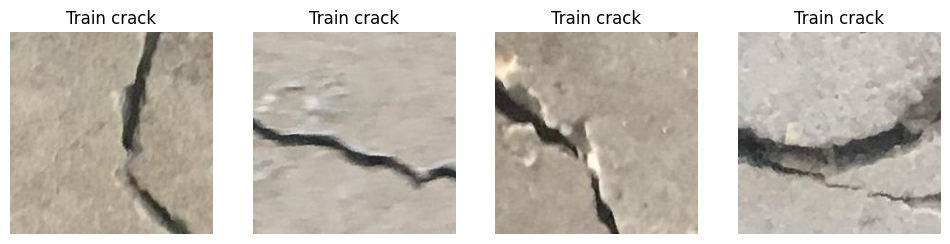

Train crack 총 이미지 수: 17650


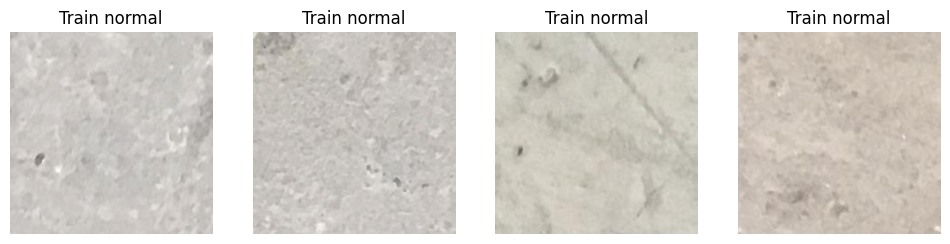

Train normal 총 이미지 수: 17900


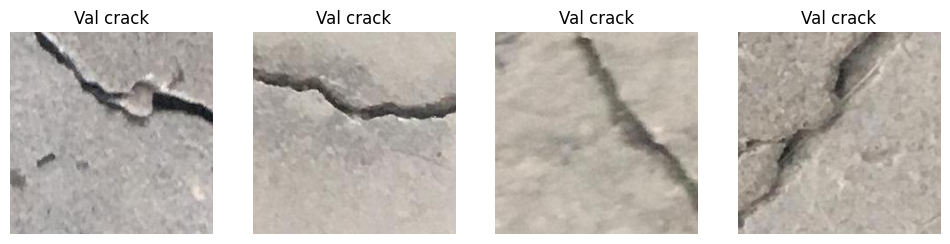

Val crack 총 이미지 수: 1600


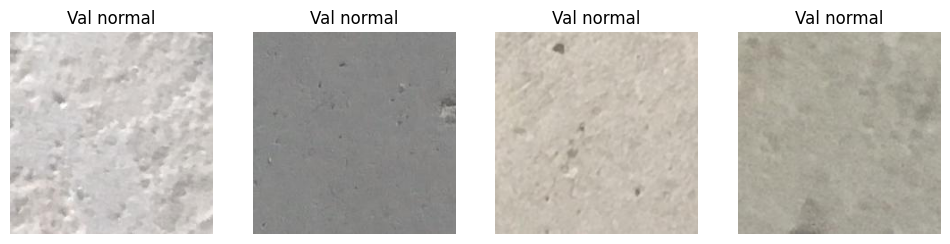

Val normal 총 이미지 수: 1700


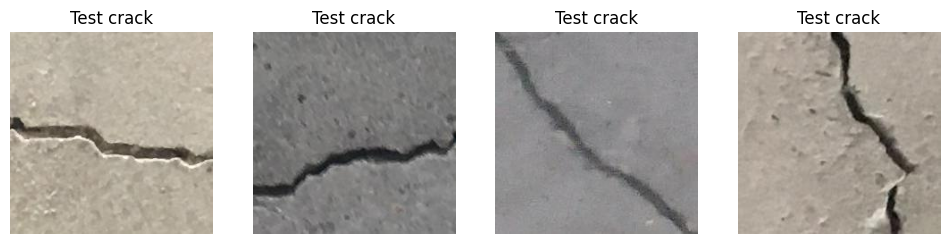

Test crack 총 이미지 수: 100


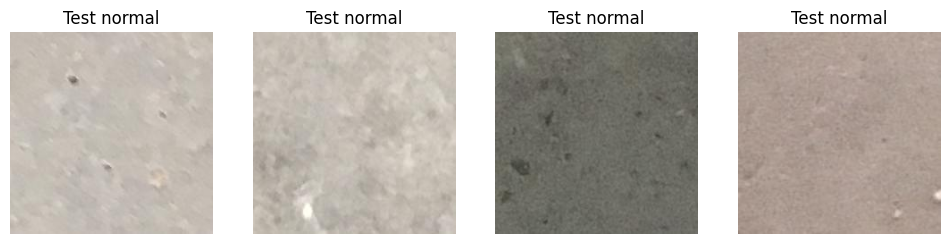

Test normal 총 이미지 수: 100


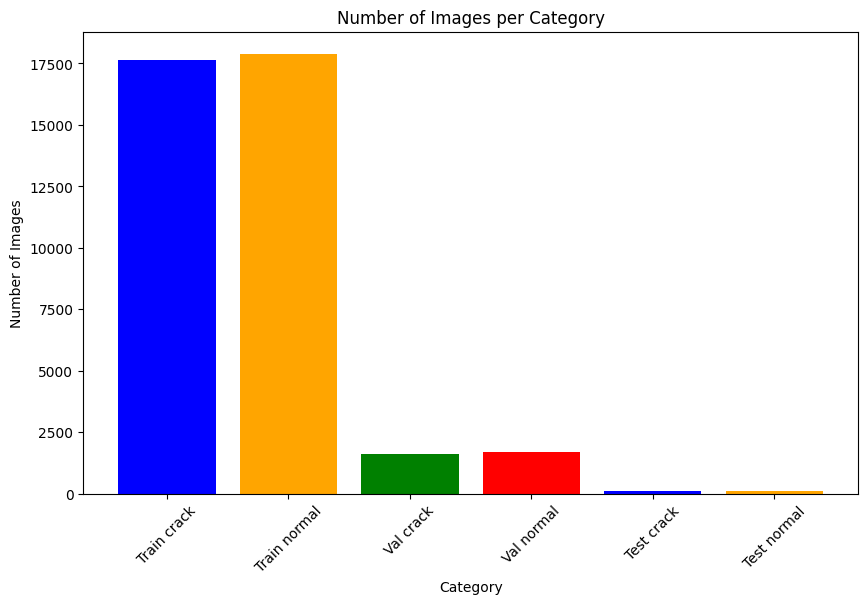

In [4]:

categories = ['Train crack', 'Train normal', 'Val crack', 'Val normal', 'Test crack', 'Test normal']

for category in categories:
    image_paths = glob.glob(f'/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/{category.lower().replace(" ", "/")}/*')
    display_images(image_paths, category)
    print(f"{category} 총 이미지 수: {len(image_paths)}")

# 바 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(categories, [len(glob.glob(f'/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/{category.lower().replace(" ", "/")}/*')) for category in categories], color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [5]:
# 데이터 전처리 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화
])

# 데이터셋 로드 및 데이터 로더 생성
train_dataset = ImageFolder('/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/train', transform=transform)
val_dataset = ImageFolder('/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/val', transform=transform)

In [6]:
from torch.utils.data import SubsetRandomSampler
import numpy as np

# 데이터셋의 인덱스를 생성
num_of_train = 34550
num_of_val = 3300
train_indices = list(range(num_of_train))
val_indices = list(range(num_of_val))

# 200개의 무작위 샘플 선택 (학습 데이터 수가 많아 실습을 진행하기 제한이 있어 설정)
np.random.shuffle(train_indices)
train_subset_indices = train_indices[:200]

np.random.shuffle(val_indices)
val_subset_indices = val_indices[:20]

# 사용자 정의 Sampler 생성
train_sampler = SubsetRandomSampler(train_subset_indices)
val_sampler = SubsetRandomSampler(val_subset_indices)

# DataLoader에 Sampler 지정
train_loader = DataLoader(dataset=train_dataset, batch_size=8, sampler=train_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_size=8, sampler=val_sampler)

### VGG 모델 로드 및 네트워크 구조 확인

In [7]:

net = models.vgg19(pretrained=True)
net

/opt/anaconda3/envs/imagebinary/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/imagebinary/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/taeyoun/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

### 모델의 모든 파라미터를 고정

In [8]:

for param in net.parameters():
    param.requires_grad = False

### 모델 수정하기 Binary Classification Task에 맞게 교체

In [9]:

net.classifier[6] = nn.Linear(4096, 2)
net.classifier[6].requires_grad = True

In [10]:
# 손실 함수
criterion = nn.CrossEntropyLoss()

In [11]:
import torch.optim as optim

def train_model(optimizer_name, net, train_loader, val_loader, criterion, num_epochs=20):
    # optimizer설정
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
    elif optimizer_name == 'RAdam':
        optimizer = optim.RAdam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    # 학습/검증 손실과 검증 정확도를 저장할 리스트
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        net.train()  # 모델을 학습 모드로 설정
        running_loss = 0.0
        for i, data in enumerate(train_loader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # 매 에포크마다 평균 학습 손실 계산
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # 검증 손실 계산
        val_loss = 0.0
        net.eval()  # 모델을 평가 모드로 설정
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)

        print(f'[{optimizer_name}] Epoch {epoch + 1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses, val_accuracies

In [12]:
train_losses_SGD, val_losses_SGD, val_accuracies_SGD = train_model('SGD', net, train_loader, val_loader, criterion)

[SGD] Epoch 1, Train Loss: 0.444300, Val Loss: 0.259436, Validation Accuracy: 90.00%
[SGD] Epoch 2, Train Loss: 0.196535, Val Loss: 0.253891, Validation Accuracy: 90.00%
[SGD] Epoch 3, Train Loss: 0.152732, Val Loss: 0.202837, Validation Accuracy: 90.00%
[SGD] Epoch 4, Train Loss: 0.108605, Val Loss: 0.172554, Validation Accuracy: 95.00%
[SGD] Epoch 5, Train Loss: 0.118258, Val Loss: 0.115896, Validation Accuracy: 95.00%
[SGD] Epoch 6, Train Loss: 0.083504, Val Loss: 0.164724, Validation Accuracy: 95.00%
[SGD] Epoch 7, Train Loss: 0.106089, Val Loss: 0.122512, Validation Accuracy: 95.00%
[SGD] Epoch 8, Train Loss: 0.098267, Val Loss: 0.108902, Validation Accuracy: 95.00%
[SGD] Epoch 9, Train Loss: 0.086377, Val Loss: 0.092700, Validation Accuracy: 95.00%
[SGD] Epoch 10, Train Loss: 0.075776, Val Loss: 0.105869, Validation Accuracy: 95.00%
[SGD] Epoch 11, Train Loss: 0.092930, Val Loss: 0.101613, Validation Accuracy: 95.00%
[SGD] Epoch 12, Train Loss: 0.080038, Val Loss: 0.107873, Valid

In [13]:
# 초기화
net = models.vgg19(pretrained=True)
for param in net.parameters():
    param.requires_grad = False
net.classifier[6] = nn.Linear(4096, 2)
net.classifier[6].requires_grad = True

In [14]:
train_losses_Adam, val_losses_Adam, val_accuracies_Adam = train_model('Adam', net, train_loader, val_loader, criterion)

[Adam] Epoch 1, Train Loss: 0.488937, Val Loss: 0.308559, Validation Accuracy: 95.00%
[Adam] Epoch 2, Train Loss: 0.151280, Val Loss: 0.162352, Validation Accuracy: 95.00%
[Adam] Epoch 3, Train Loss: 0.123326, Val Loss: 0.151104, Validation Accuracy: 95.00%
[Adam] Epoch 4, Train Loss: 0.107036, Val Loss: 0.156090, Validation Accuracy: 95.00%
[Adam] Epoch 5, Train Loss: 0.080625, Val Loss: 0.184206, Validation Accuracy: 95.00%
[Adam] Epoch 6, Train Loss: 0.092112, Val Loss: 0.150739, Validation Accuracy: 95.00%
[Adam] Epoch 7, Train Loss: 0.081898, Val Loss: 0.117661, Validation Accuracy: 95.00%
[Adam] Epoch 8, Train Loss: 0.070061, Val Loss: 0.105088, Validation Accuracy: 95.00%
[Adam] Epoch 9, Train Loss: 0.068905, Val Loss: 0.102920, Validation Accuracy: 95.00%
[Adam] Epoch 10, Train Loss: 0.052116, Val Loss: 0.120853, Validation Accuracy: 95.00%
[Adam] Epoch 11, Train Loss: 0.061612, Val Loss: 0.090080, Validation Accuracy: 95.00%
[Adam] Epoch 12, Train Loss: 0.069875, Val Loss: 0.1

In [15]:
# 초기화
net = models.vgg19(pretrained=True)
for param in net.parameters():
    param.requires_grad = False
net.classifier[6] = nn.Linear(4096, 2)
net.classifier[6].requires_grad = True

In [16]:
train_losses_RAdam, val_losses_RAdam, val_accuracies_RAdam = train_model('RAdam', net, train_loader, val_loader, criterion)

[RAdam] Epoch 1, Train Loss: 0.722878, Val Loss: 0.728766, Validation Accuracy: 40.00%
[RAdam] Epoch 2, Train Loss: 0.615508, Val Loss: 0.574471, Validation Accuracy: 80.00%
[RAdam] Epoch 3, Train Loss: 0.460072, Val Loss: 0.441702, Validation Accuracy: 90.00%
[RAdam] Epoch 4, Train Loss: 0.390544, Val Loss: 0.395039, Validation Accuracy: 90.00%
[RAdam] Epoch 5, Train Loss: 0.295759, Val Loss: 0.348725, Validation Accuracy: 90.00%
[RAdam] Epoch 6, Train Loss: 0.245567, Val Loss: 0.300155, Validation Accuracy: 95.00%
[RAdam] Epoch 7, Train Loss: 0.201769, Val Loss: 0.294808, Validation Accuracy: 95.00%
[RAdam] Epoch 8, Train Loss: 0.181013, Val Loss: 0.251715, Validation Accuracy: 95.00%
[RAdam] Epoch 9, Train Loss: 0.164220, Val Loss: 0.206170, Validation Accuracy: 95.00%
[RAdam] Epoch 10, Train Loss: 0.144141, Val Loss: 0.231592, Validation Accuracy: 95.00%
[RAdam] Epoch 11, Train Loss: 0.137375, Val Loss: 0.184993, Validation Accuracy: 95.00%
[RAdam] Epoch 12, Train Loss: 0.119901, V

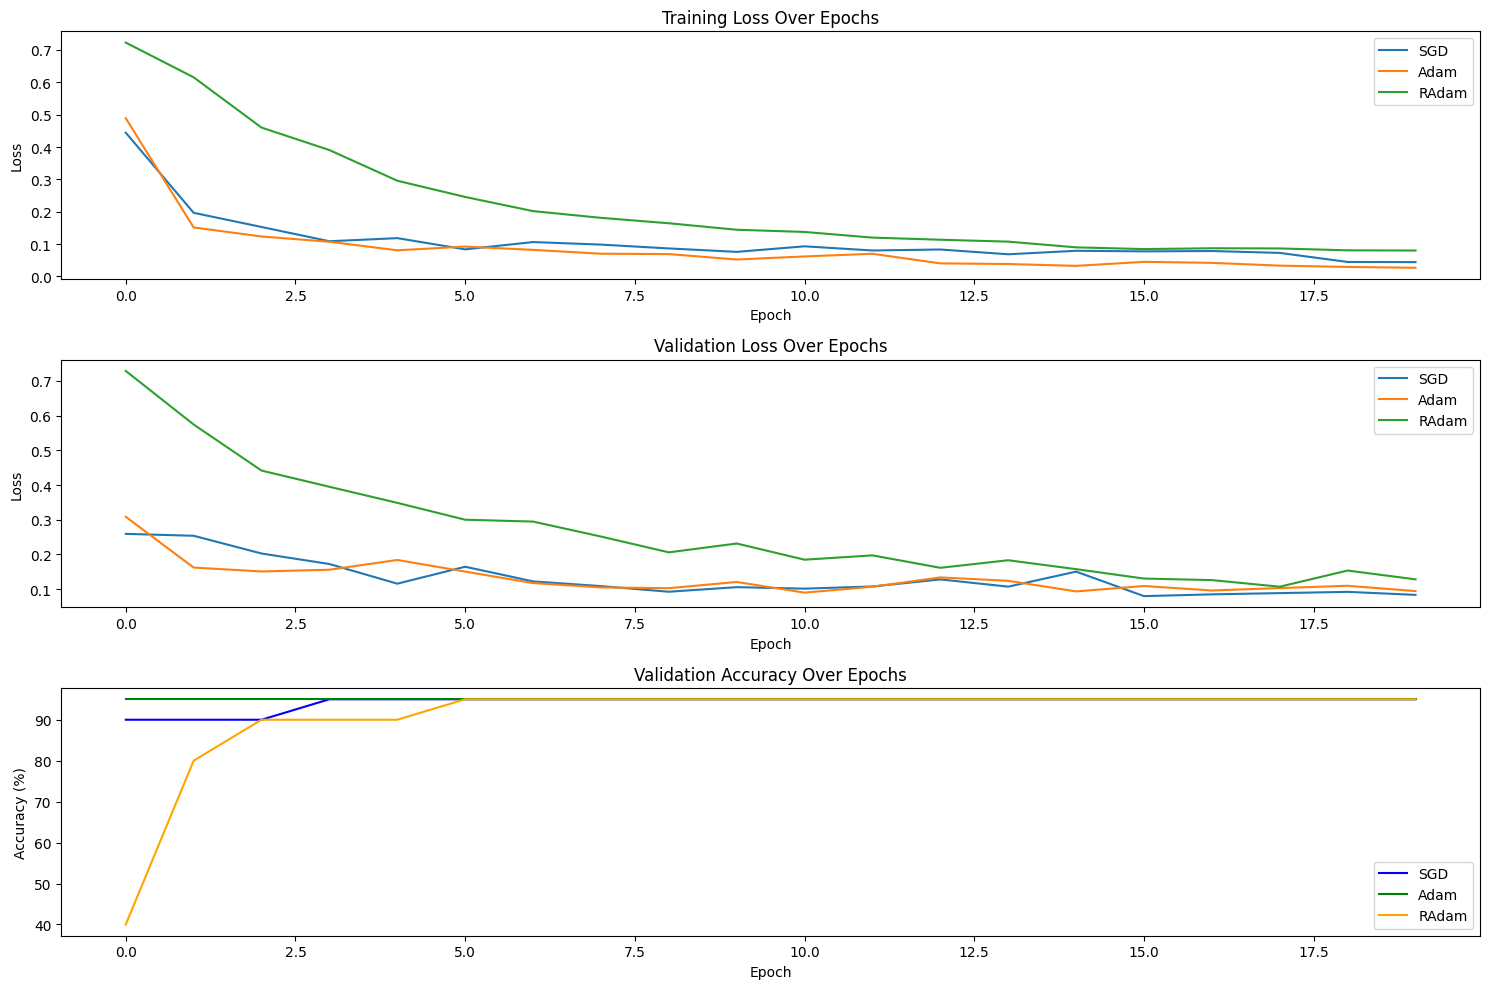

In [17]:
# 학습 손실과 검증 정확도 그래프 그리기
plt.figure(figsize=(15, 10))

# 학습 손실 그래프
plt.subplot(3, 1, 1)  # 3행 1열의 첫 번째 위치
plt.plot(train_losses_SGD, label='SGD')
plt.plot(train_losses_Adam, label='Adam')
plt.plot(train_losses_RAdam, label='RAdam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 검증 손실 그래프
plt.subplot(3, 1, 2)  # 3행 1열의 두 번째 위치
plt.plot(val_losses_SGD, label='SGD')
plt.plot(val_losses_Adam, label='Adam')
plt.plot(val_losses_RAdam, label='RAdam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

# 검증 정확도 그래프
plt.subplot(3, 1, 3)  # 3행 1열의 세 번째 위치
plt.plot(val_accuracies_SGD, label='SGD', color='blue')
plt.plot(val_accuracies_Adam, label='Adam', color='green')
plt.plot(val_accuracies_RAdam, label='RAdam', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Image load 및 tensor로 변환
def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # 이미지를 모델에 맞게 변환하고 배치 차원 추가

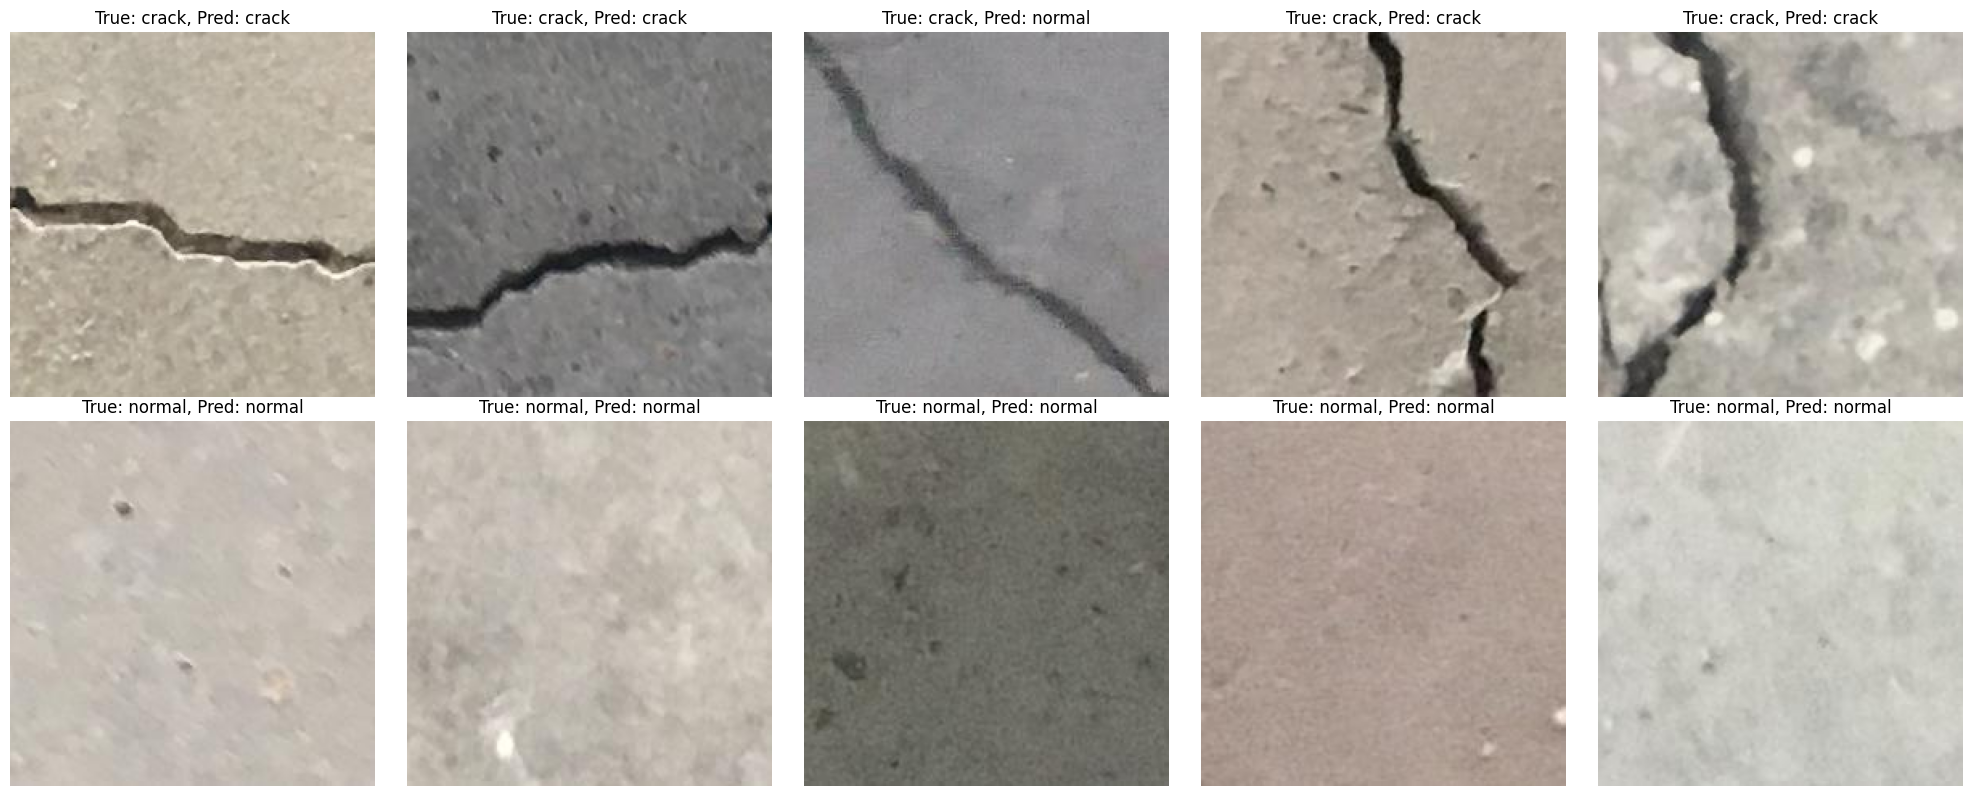

In [19]:
# 클래스별 폴더 경로
class_folders = {
    'crack': '//Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/test/crack',
    'normal': '/Users/taeyoun/Downloads/DeepLearning/project/Chapter 1. Binary Classification _ 두 선택지 중 하나를 선택하여 판별하는 분류 방법/실습 파일/3/test/normal'
}

plt.figure(figsize=(20, 8))
# subplot 인덱스를 위한 카운터
counter = 1

# 각 클래스별로 5장의 이미지 추론 및 시각화
for class_name, folder_path in class_folders.items():
    # 해당 클래스의 이미지 경로 가져오기
    image_paths = glob.glob(os.path.join(folder_path, '*'))
    selected_paths = image_paths[:5]  # 첫 5장 선택

    for image_path in selected_paths:
        image = load_and_transform_image(image_path, transform)

        net.eval()  # 모델을 평가 모드로 설정
        # 모델을 사용한 추론
        with torch.no_grad():
            outputs = net(image)
            _, predicted = torch.max(outputs, 1)
        prediction = 'crack' if predicted.item() == 0 else 'normal'

        # 결과 시각화
        plt.subplot(2, 5, counter)
        plt.imshow(Image.open(image_path))
        plt.title(f'True: {class_name}, Pred: {prediction}')
        plt.axis('off')

        counter += 1  # subplot 인덱스 업데이트

plt.tight_layout()
plt.show()